# Personalised Mecidine - Exploratory Data Analysis

### Key Points for presentation
- Describe the problem.
- Describe the dataset using visualizations and statistical measures.
- Describe the challenges you might face and propose some solutions.
- Give a high level time plan for finishing the project.

## Goal of project
Automatically classify genetic mutations that contribute to cancer tumor growth drivers) vs. presence of mutations that don’t affect the tumors (passengers)

## Importing data

In [7]:
import pandas as pd

In [8]:
d_train = pd.read_csv('genetic-data/training_variants')
d_train.columns

Index(['ID', 'Gene', 'Variation', 'Class'], dtype='object')

### Variable Understanding

- ID - A specific gene of the specimen
- Gene - The specific gene where the mutation took place
- Variation - the nature of the mutation
- Class - Class which we must predict
    - between 1 and 9

In [9]:
# get intitial statistics for columns
d_train.describe()

,ID,Class
count,3321.000000,3321.000000
mean,1660.000000,4.365854
std,958.834449,2.309781
min,0.000000,1.000000
25%,830.000000,2.000000
50%,1660.000000,4.000000
75%,2490.000000,7.000000
max,3320.000000,9.000000


In [10]:
d_train.dtypes

ID            int64
Gene         object
Variation    object
Class         int64
dtype: object

In [11]:
d_train.apply(pd.Series.nunique)

ID           3321
Gene          264
Variation    2996
Class           9
dtype: int64

We now know that there are 3321 records in our training set - all of which are unique.
Although we have 264 unique genes and 2996 unique variations.
Lastly there are 9 classes.

## Initial visualizations

### Class Visualizations

In [12]:
import seaborn as sns

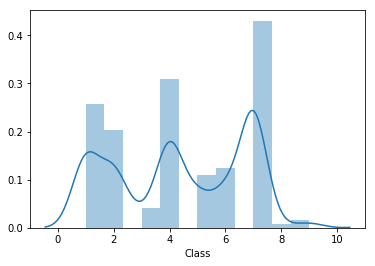

In [13]:
# histogram of classes
sns.distplot(d_train['Class']);

- Not normally distributed
- Its 3 peaks seem to be class 1, 4, and 7?

In [14]:
# skewness and kurtosis
print("Skewness: %f" % d_train['Class'].skew())
print("Kurtosis: %f" % d_train['Class'].kurt())

Skewness: -0.113242
Kurtosis: -1.352660


- slight negative skew tells us that it is slightly left tailed
- negative value for kurtosis tells us it is slightly platykurtic (low)

In [15]:
# converting Gene and Variation to categories
d_train['Gene'] = d_train['Gene'].astype('category')
d_train['Variation'] = d_train['Variation'].astype('category')
d_train['Gene'].head().cat.codes

0    85
1    39
2    39
3    39
4    39
dtype: int16

In [16]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

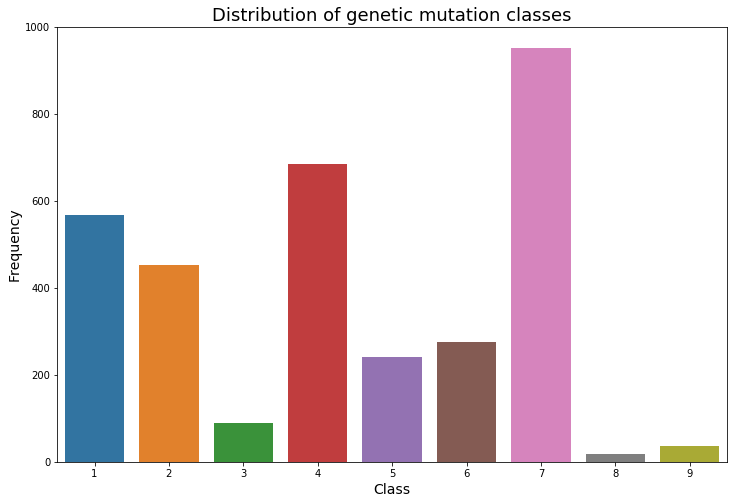

In [19]:
plt.figure(figsize=(12,8))
sns.countplot(x="Class", data=d_train)
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Class', fontsize=14)
plt.title("Distribution of genetic mutation classes", fontsize=18)
plt.show()

### Gene Visualizations

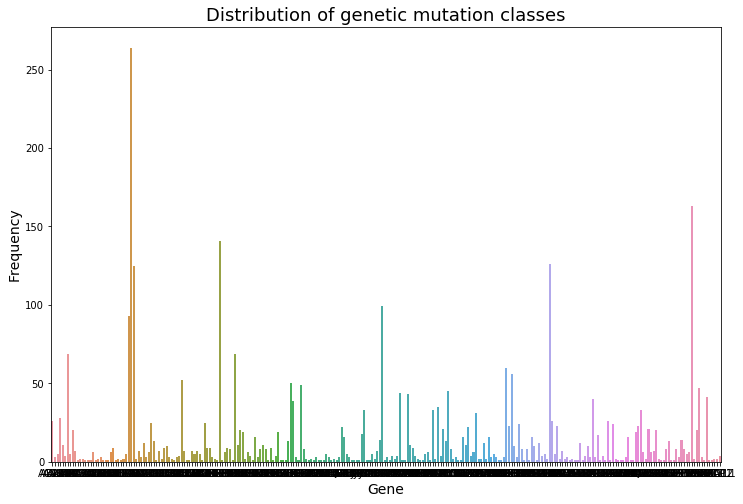

In [20]:
plt.figure(figsize=(12,8))
sns.countplot(x="Gene", data=d_train)
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Gene', fontsize=14)
plt.title("Distribution of genetic mutation classes", fontsize=18)
plt.show()

In [26]:
gene_group = d_train.groupby("Gene")['Gene'].count()


In [28]:
gene_group_asc = gene_group.sort_values(ascending=True)

In [36]:
print("Bottom-10 Gene Occurances\n", gene_group_asc[:10])
print()
print("Top-10 Gene Occurances\n", gene_group_asc.sort_values(ascending=False)[:10])

Bottom-10 Gene Occurances
 Gene
KLF4      1
FGF19     1
FANCC     1
FAM58A    1
PAK1      1
ERRFI1    1
PAX8      1
PIK3R3    1
PMS1      1
PPM1D     1
Name: Gene, dtype: int64

Top-10 Gene Occurances
 Gene
BRCA1     264
TP53      163
EGFR      141
PTEN      126
BRCA2     125
KIT        99
BRAF       93
ERBB2      69
ALK        69
PDGFRA     60
Name: Gene, dtype: int64


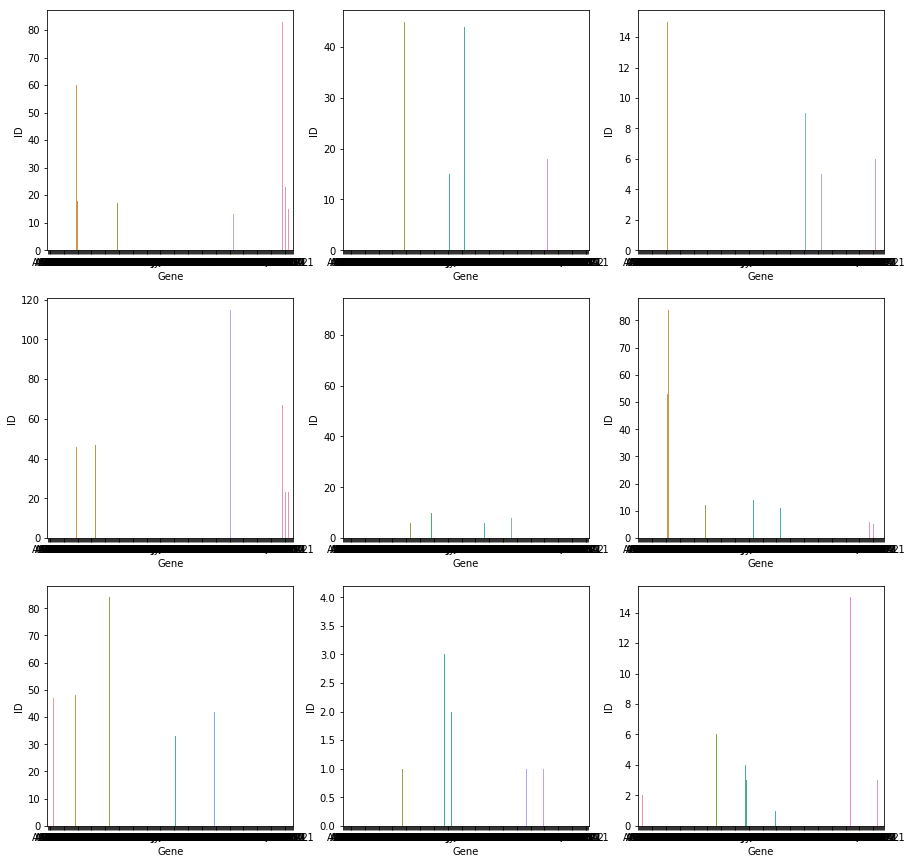

In [37]:
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(15,15))

for i in range(3):
    for j in range(3):
        gene_count_grp = d_train[d_train["Class"]==((i*3+j)+1)].groupby('Gene')["ID"].count().reset_index()
        sorted_gene_group = gene_count_grp.sort_values('ID', ascending=False)
        sorted_gene_group_top_7 = sorted_gene_group[:7]
        sns.barplot(x="Gene", y="ID", data=sorted_gene_group_top_7, ax=axs[i][j])